# 출처 : [Kaggle 2020] Visualization & Analysis
### https://www.kaggle.com/subinium/kaggle-2020-visualization-analysis/notebook

## Visualization & Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches #그래프에 다양한 2D 도형을 표현하기 위한 클래스를 포함
import matplotlib.gridspec as gridspec

from matplotlib.offsetbox import AnchoredText
from mpl_toolkits.axes_grid1 import make_axes_locatable

import seaborn as sns
import warnings

warnings.filterwarnings(action = 'ignore')
plt.rcParams['figure.dpi'] = 200 #high resolution

In [5]:
data = pd.read_csv(r"./dataset/kaggle_survey_2020_responses.csv")
data

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


In [10]:
question = data.iloc[0].T
data = data.drop([0])

## Q1 & Q2 Age/Gender Distribution

[Text(0, 0, '18-21'),
 Text(0, 0, '22-24'),
 Text(0, 0, '25-29'),
 Text(0, 0, '30-34'),
 Text(0, 0, '35-39'),
 Text(0, 0, '40-44'),
 Text(0, 0, '45-49'),
 Text(0, 0, '50-54'),
 Text(0, 0, '55-59'),
 Text(0, 0, '60-69'),
 Text(0, 0, '70+')]

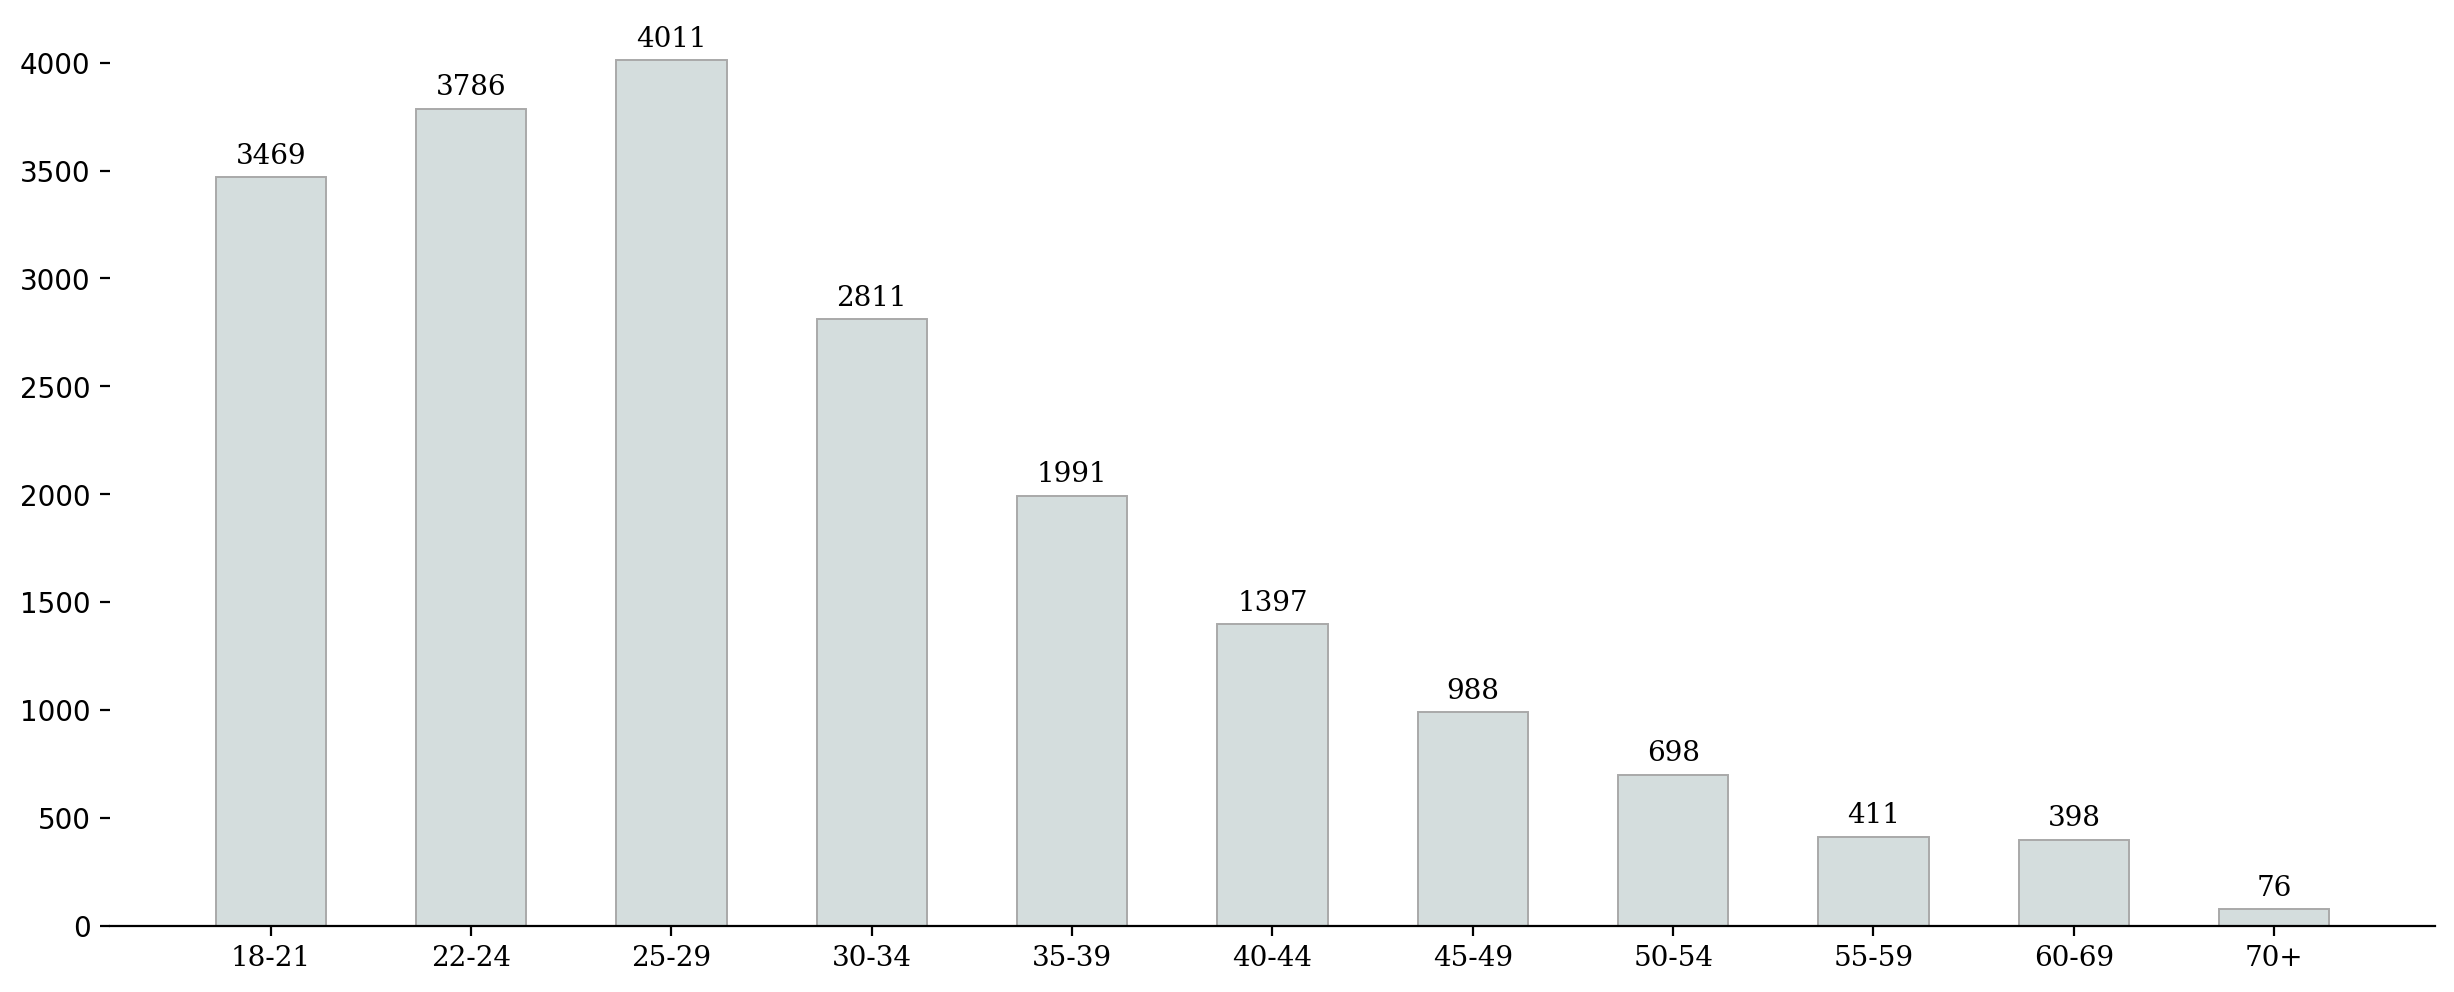

In [49]:
fig, ax = plt.subplots(1,1,figsize = (15,6))
data_q1 = data.Q1.value_counts().sort_index()
ax.bar(data_q1.index, data_q1, width=0.55,
      edgecolor = 'darkgray', color = '#d4dddd',
      linewidth = 0.7)

for i in data_q1.index:
    ax.annotate(f"{data_q1[i]}",
                xy = (i, data_q1[i]+100),
                va = 'center', ha = 'center', fontweight = 'light',fontfamily = 'serif')
    #xy : 글자 위치
    #va & ha : value 위치 
    #fontweight : 글자 굵기
    #fontfamily : 글꼴
    
for s in ['top','left','right']:
    ax.spines[s].set_visible(False) #그래프 테두리 속성
    
ax.set_ylim(0, 4200) #y축 축 범위 지정
ax.set_xticklabels(data_q1.index, fontfamily = 'serif') #x축 텍스트 변경
ax.set_yticklabels(np.arange(0,4001,500),fontfamily = 'serif') #y축 텍스트 변경
fig.text(0.1, 0.95 'Age Distribution', fontsize = 15, fontweight = "bold", fontfamily = 'serif')
